In [1]:
from datasets import load_dataset
from matplotlib import pyplot as plt
import numpy as np

In [2]:
dataDESY3 = load_dataset("../data/20230814_224x224/20230814_224x224.py", "DESY3", cache_dir="/pscratch/sd/s/shubh/")
dataDES = load_dataset("../data/20230419_224x224/20230419_224x224.py", "DES", cache_dir="/pscratch/sd/s/shubh/")

/global/homes/s/shubh/.cache/huggingface/modules/datasets_modules/datasets/20230814_224x224.lock
/pscratch/sd/s/shubh/_pscratch_sd_s_shubh_20230814_224x224_DESY3_1.1.0_1095d0d851dbdc0d0adc68417e5568f5b3b2f58aa2d0cc8c345571065eccdf0e.lock


Found cached dataset 20230814_224x224 (/pscratch/sd/s/shubh/20230814_224x224/DESY3/1.1.0/1095d0d851dbdc0d0adc68417e5568f5b3b2f58aa2d0cc8c345571065eccdf0e)


/pscratch/sd/s/shubh/20230814_224x224/DESY3/1.1.0/1095d0d851dbdc0d0adc68417e5568f5b3b2f58aa2d0cc8c345571065eccdf0e_builder.lock


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset 20230419_224x224 (/pscratch/sd/s/shubh/20230419_224x224/DES/1.1.0/5bdb7352000a65463d32866a2abfdfdabcf6d745536317c3f1612776fea32da7)


/global/homes/s/shubh/.cache/huggingface/modules/datasets_modules/datasets/20230419_224x224.lock
/pscratch/sd/s/shubh/_pscratch_sd_s_shubh_20230419_224x224_DES_1.1.0_5bdb7352000a65463d32866a2abfdfdabcf6d745536317c3f1612776fea32da7.lock
/pscratch/sd/s/shubh/20230419_224x224/DES/1.1.0/5bdb7352000a65463d32866a2abfdfdabcf6d745536317c3f1612776fea32da7_builder.lock


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
index = 0

for ind in ['As', 'bary_Mc', 'bary_nu', 'H0', 'O_cdm', 'O_nu', 'Ob', 'Om', 'ns', 's8', 'w0', 'sim_type', 'sim_name']:
    print(dataDESY3["test"][index][ind])
    print(dataDES["test"][index][ind])

ValueError: cannot reshape array of size 200704 into shape (1,224,224,24)

In [21]:
np.array(dataDESY3["test"][index]["map"]).shape, np.array(dataDES["test"][index]["map"]).shape

((224, 224, 24), (224, 224, 40))

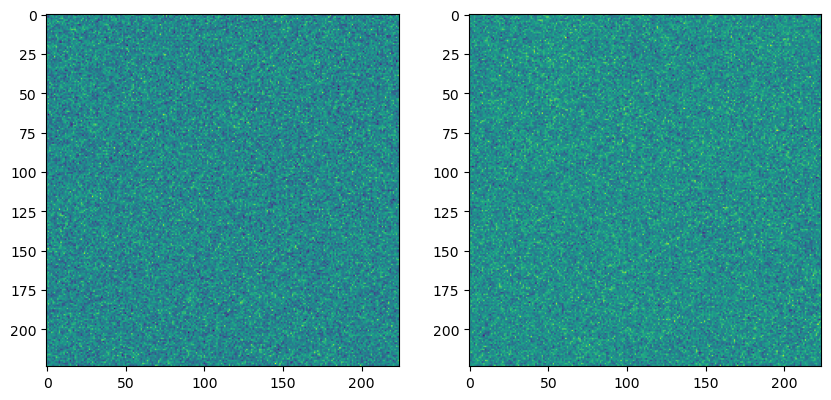

In [22]:
plt.figure(2, figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(np.array(dataDESY3["test"][index]["map"])[:, :, 3])
plt.subplot(1, 2, 2)
plt.imshow(np.array(dataDES["test"][index]["map"])[:, :, 3])
plt.show()
plt.close()

In [33]:
print(np.mean(np.array(dataDESY3["test"][index]["map"])[:, :, 3]), np.mean(np.array(dataDES["test"][index]["map"])[:, :, 3]))
print(np.std(np.array(dataDESY3["test"][index]["map"])[:, :, 3]), np.std(np.array(dataDES["test"][index]["map"])[:, :, 3]))

0.06449119911416223 0.0642914200587255
0.218806284704847 0.032381846299165316


In [32]:
print(np.mean(np.array(dataDESY3["test"][index]["map"])), np.mean(np.array(dataDES["test"][index]["map"])[:, :, :24]))
print(np.std(np.array(dataDESY3["test"][index]["map"])), np.std(np.array(dataDES["test"][index]["map"])[:, :, :24]))

0.033774878994068926 0.03377140901025467
0.2211867454326172 0.038533465589387604


In [25]:
np.std(np.array(dataDESY3["test"][index]["map"]) - np.array(dataDES["test"][index]["map"])[:,:,:24])

0.22249921025412916

In [26]:
0.26 / np.sqrt(5.59 *  / 4)

0.21993656590766306

In [28]:
noiseless_DESY3 = np.load(f"../data/20230814_224x224/{dataDESY3['test'][index]['sim_name']}.npy")
noiseless_DES = np.load(f"../data/20230419_224x224/{dataDES['test'][index]['sim_name']}.npy")

noiseless_DESY3.shape, noiseless_DES.shape

((224, 224, 224, 4), (70, 224, 224, 4))

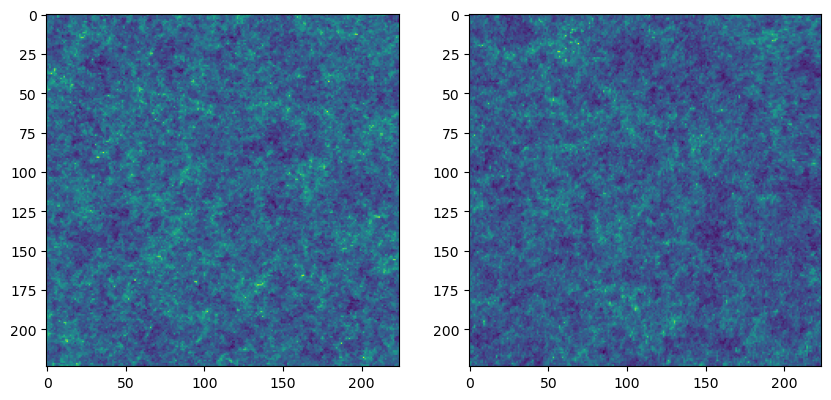

In [29]:
plt.figure(2, figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(noiseless_DESY3[0, :, :, 3])
plt.subplot(1, 2, 2)
plt.imshow(noiseless_DES[0, :, :, 3])
plt.show()
plt.close()

In [30]:
print(np.mean(noiseless_DESY3[0, :, :, 3]), np.mean(noiseless_DES[0, :, :, 3]))
print(np.std(noiseless_DESY3[0, :, :, 3]), np.std(noiseless_DES[0, :, :, 3]))

0.06390199701327591 0.06401689835599557
0.004737378472003322 0.004826214083951414


In [31]:
print(np.mean((noiseless_DESY3 + np.random.normal(0, 0.26 / np.sqrt(5.59/4), noiseless_DESY3.shape))[:, :, :, 3]), \
      np.mean((noiseless_DES + np.random.normal(0, 0.26 / np.sqrt(5.59/4), noiseless_DES.shape))[:, :, :, 3]))
print(np.std((noiseless_DESY3 + np.random.normal(0, 0.26 / np.sqrt(5.59/4), noiseless_DESY3.shape))[:, :, :, 3]), \
        np.std((noiseless_DES + np.random.normal(0, 0.26 / np.sqrt(5.59/4), noiseless_DES.shape))[:, :, :, 3]))

0.06394218965382995 0.06418721980769913
0.21996622417045827 0.2199350506957542


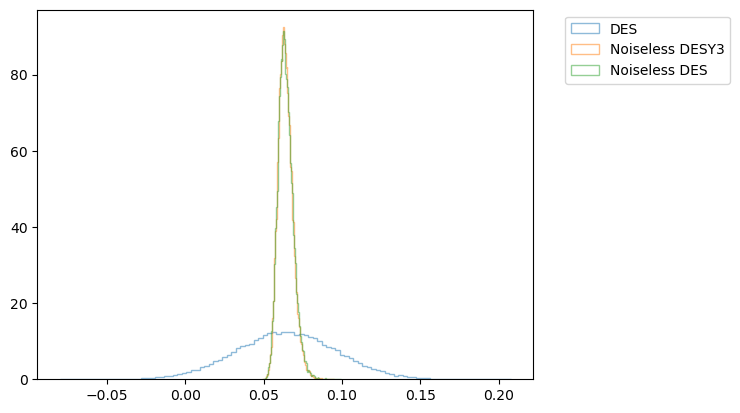

In [45]:
plt.figure()
# plt.hist(np.array(dataDESY3["test"][index]["map"])[:, :, 3].flatten(), bins=100, alpha=0.5, label="DESY3", density=True, histtype='step')
plt.hist(np.array(dataDES["test"][index]["map"])[:, :, 3].flatten(), bins=100, alpha=0.5, label="DES", density=True, histtype='step')
plt.hist(noiseless_DESY3[0, :, :, 3].flatten(), bins=100, alpha=0.5, label="Noiseless DESY3", density=True, histtype='step')
plt.hist(noiseless_DES[0, :, :, 3].flatten(), bins=100, alpha=0.5, label="Noiseless DES", density=True, histtype='step')
# plt.hist((noiseless_DESY3 + np.random.normal(0, 0.26 / np.sqrt(5.59/4), noiseless_DESY3.shape))[:, :, :, 3].flatten(), \
#          bins=100, alpha=0.5, label="Noisy DESY3", density=True, histtype='step')
# plt.hist((noiseless_DES + np.random.normal(0, 0.26 / np.sqrt(5.59/4), noiseless_DES.shape))[:, :, :, 3].flatten(), \
#          bins=100, alpha=0.5, label="Noisy DES", density=True, histtype='step')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
plt.close()

In [8]:
import os
import numpy as np

datasets = np.sort(os.listdir("/pscratch/sd/s/shubh/20230814_224x224/"))
datasets

array(['DESY3', 'DESY3_double', 'DESY3_half', 'DESY3_half_twice',
       'DESY3_onebin', 'DESY3_twice', 'LSSTY1', 'LSSTY10',
       'LSSTY10_double', 'LSSTY10_half', 'LSSTY10_half_twice',
       'LSSTY10_onebin', 'LSSTY10_twice', 'LSSTY1_double', 'LSSTY1_half',
       'LSSTY1_half_twice', 'LSSTY1_onebin', 'LSSTY1_twice'], dtype='<U18')

In [ ]:
for dataset in datasets:
    d = load_dataset("../data/20230814_224x224/20230814_224x224.py", dataset, cache_dir="/pscratch/sd/s/shubh/")
    print(d)